In [1]:
!pip install sastrawi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import requests
from io import StringIO
import nltk
import csv
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,GlobalAveragePooling1D, MaxPooling1D, Flatten, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df = pd.read_csv("ulasan.csv")
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,30c0b603-5c09-4864-8f48-c40b0cec85e2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Secara pelayanan aplikasi saya cukup puas, tap...",5,1136,5.312.0,2024-07-15 15:07:22,NaN,NaN,5.312.0
1,e65583b9-a400-4bf0-aa7f-2f4f746721b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya tolong diperbaiki. Mau ngatur titi...,4,198,5.313.0,2024-07-17 07:18:53,NaN,NaN,5.313.0
2,02d20e36-8802-4540-99b1-b71230b81744,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Guah pelanggan GRAB dari pertama ada GRAB,,, d...",5,2103,5.310.0,2024-06-17 07:47:18,Terima kasih atas kepercayaan kakak pada layan...,2024-06-17 08:13:08,5.310.0
3,8f17f55e-8b67-4219-8da9-ea29462f2722,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya ralat penilaian saya dr 5 ke 1, klo bisa ...",1,4,5.315.0,2024-08-06 11:52:14,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2024-08-06 12:16:17,5.315.0
4,ad512468-5631-42e7-98be-767b4bc9f116,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"makin update App Grab makin parah, masa kita m...",1,5,5.315.0,2024-08-05 23:29:00,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabi...,2024-08-07 03:24:44,5.315.0
...,...,...,...,...,...,...,...,...,...,...,...
188995,6f41d83d-0475-4071-9f09-a1aff212a6c0,nana tobing,https://play-lh.googleusercontent.com/a-/ALV-U...,pelayanan bagus,5,0,5.155.1,2021-09-28 05:33:42,\nTerima kasih Kak sudah jadi pengguna setia G...,2021-09-28 07:24:13,5.155.1
188996,26ce1224-07a4-4872-9b68-e0fb8e0208ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangt membntu cmn apl ny ko skrng nympe 289MB....,5,0,5.64.0,2019-10-19 07:47:14,NaN,NaN,5.64.0
188997,332fa6de-b189-48dd-bb4c-4bff8f657b57,Haris Doblenk,https://play-lh.googleusercontent.com/a-/ALV-U...,"Grab skrag Gak berpungsi gak kaya dulu,susah",1,0,NaN,2023-03-05 13:53:48,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabi...,2023-03-05 21:41:19,NaN
188998,c5e74ee5-ee6c-423b-aee2-799db451be84,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,membantu di saat2 tertentu.,5,0,5.54.2,2019-08-12 00:39:38,NaN,NaN,5.54.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189000 entries, 0 to 188999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              189000 non-null  object
 1   userName              189000 non-null  object
 2   userImage             189000 non-null  object
 3   content               189000 non-null  object
 4   score                 189000 non-null  int64 
 5   thumbsUpCount         189000 non-null  int64 
 6   reviewCreatedVersion  153897 non-null  object
 7   at                    189000 non-null  object
 8   replyContent          42283 non-null   object
 9   repliedAt             42283 non-null   object
 10  appVersion            153897 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.9+ MB


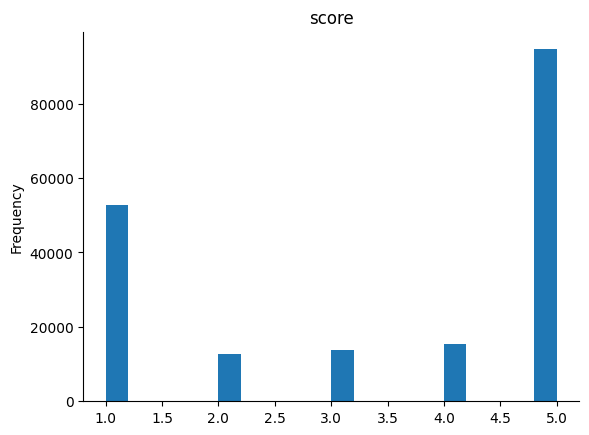

In [6]:
df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

np.int64(166)

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32468 entries, 2 to 188999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              32468 non-null  object
 1   userName              32468 non-null  object
 2   userImage             32468 non-null  object
 3   content               32468 non-null  object
 4   score                 32468 non-null  int64 
 5   thumbsUpCount         32468 non-null  int64 
 6   reviewCreatedVersion  32468 non-null  object
 7   at                    32468 non-null  object
 8   replyContent          32468 non-null  object
 9   repliedAt             32468 non-null  object
 10  appVersion            32468 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.0+ MB


In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()

    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    text = nltk.word_tokenize(text)
    return text

def filteringText(text):
    stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

    custom_stopwords = {'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"}
    stop_words.update(custom_stopwords)


    return [word for word in text if word not in stop_words]

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "gk": "gak"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
2,02d20e36-8802-4540-99b1-b71230b81744,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Guah pelanggan GRAB dari pertama ada GRAB,,, d...",5,2103,5.310.0,2024-06-17 07:47:18,Terima kasih atas kepercayaan kakak pada layan...,2024-06-17 08:13:08,5.310.0
3,8f17f55e-8b67-4219-8da9-ea29462f2722,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya ralat penilaian saya dr 5 ke 1, klo bisa ...",1,4,5.315.0,2024-08-06 11:52:14,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2024-08-06 12:16:17,5.315.0
4,ad512468-5631-42e7-98be-767b4bc9f116,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"makin update App Grab makin parah, masa kita m...",1,5,5.315.0,2024-08-05 23:29:00,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabi...,2024-08-07 03:24:44,5.315.0
5,b97459f6-0df4-4134-9dd0-a3b8696173a2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang setiap aku pesan grabfood selalu dapa...,3,11,5.315.0,2024-08-02 04:22:35,Maaf ya atas ketidaknyamanan yang terjadi.\nKa...,2024-08-03 08:30:02,5.315.0
6,8511d653-2ddb-4bbc-b2cc-da753ee9c887,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gara2 iklan search jadi salah kasih rating. In...,3,3,5.317.0,2024-08-05 09:53:38,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2024-08-05 13:45:15,5.317.0
...,...,...,...,...,...,...,...,...,...,...,...
188974,f959078f-838c-4416-ae56-e263787fba6e,nurul alfida,https://play-lh.googleusercontent.com/a-/ALV-U...,Drivernya pilih pilih,1,0,5.143.0,2021-05-04 05:01:14,Hi Kak.\nMohon maaf atas ketidaknyamanannya.\n...,2021-05-04 05:38:40,5.143.0
188977,3dcf4b8d-5a8e-4ca4-86cc-1c2a6b090626,Kharisma Putri Laila Salsabila,https://play-lh.googleusercontent.com/a-/ALV-U...,Payahhhhhh. Jelek bgttt ni skrg grab,4,0,5.23.1,2022-06-24 13:05:17,Maaf ya atas ketidaknyamanan yang terjadi. 🙏🏼 ...,2022-10-24 19:39:28,5.23.1
188986,aaf03fdb-4242-440e-8973-12732d725566,Nadya Berliana,https://play-lh.googleusercontent.com/a-/ALV-U...,Upgarde mulu kerjaany.,1,0,5.125.0,2021-03-03 12:14:47,Hi Kak Nadya.\nMohon maaf atas ketidaknyamanan...,2021-03-03 12:58:21,5.125.0
188995,6f41d83d-0475-4071-9f09-a1aff212a6c0,nana tobing,https://play-lh.googleusercontent.com/a-/ALV-U...,pelayanan bagus,5,0,5.155.1,2021-09-28 05:33:42,\nTerima kasih Kak sudah jadi pengguna setia G...,2021-09-28 07:24:13,5.155.1


In [14]:
df['text_clean'] = df['content'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [15]:
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [16]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [17]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negative    15479
positive    12042
neutral      4947
Name: count, dtype: int64


In [18]:
df = df.drop(columns=['reviewId',	'userName',	'userImage',	'content',	'score',	'thumbsUpCount',	'reviewCreatedVersion',	'at',	'replyContent',	'repliedAt',	'appVersion',	'text_clean',	'text_casefoldingText',	'text_slangwords',	'text_tokenizingText',	'text_stopword'])
df.head()

,text_akhir,polarity_score,polarity
2,guah pelanggan grab grab udh pakai apk zaman a...,-7,negative
3,ralat penilaian dr minus dikhianati pesanan gr...,-13,negative
4,update app grab parah memesan makanan harganya...,-3,negative
5,pesan grabfood drivernya pesanannya pdhal paka...,7,positive
6,gara iklan search salah kasih rating sudab cek...,-26,negative


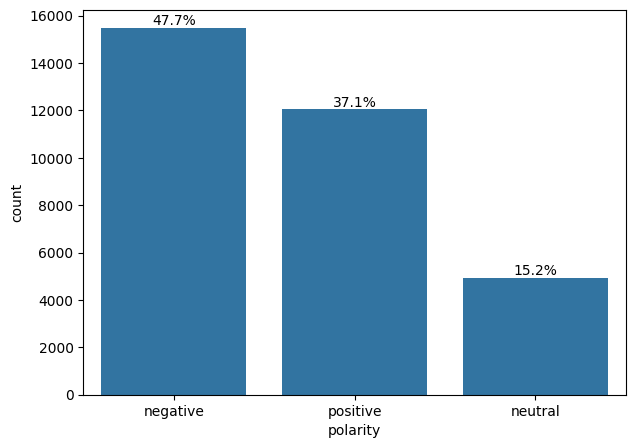

In [19]:
plt.figure(figsize=(7, 5));
g = sns.countplot(x='polarity', data=df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [20]:
pd.set_option('display.max_colwidth', 16000)
positive_tweets = df[df['polarity'].str.lower() == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets.index += 1

In [21]:
pd.set_option('display.max_colwidth', 13000)
negative_tweets = df[df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [22]:
pd.set_option('display.max_colwidth', 10000)
neutral_tweets = df[df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)
neutral_tweets = neutral_tweets[0:10]
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

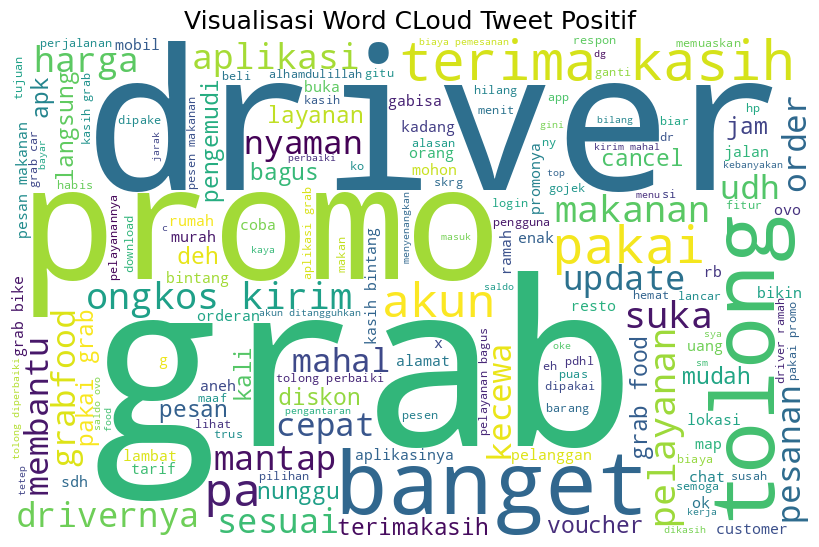

In [23]:
list_words = ' '.join(positive_tweets['text_akhir'])
wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Visualisasi Word CLoud Tweet Positif', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

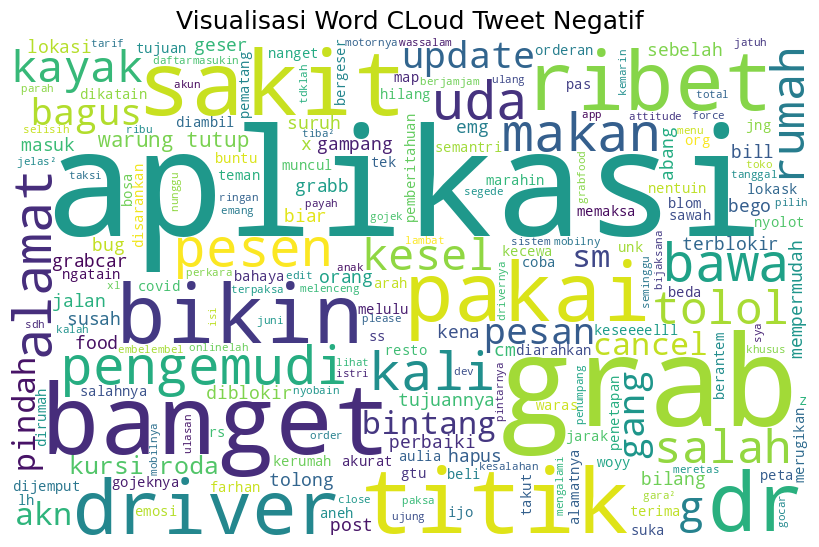

In [24]:
list_words = ' '.join(negative_tweets['text_akhir'])
wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Visualisasi Word CLoud Tweet Negatif', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

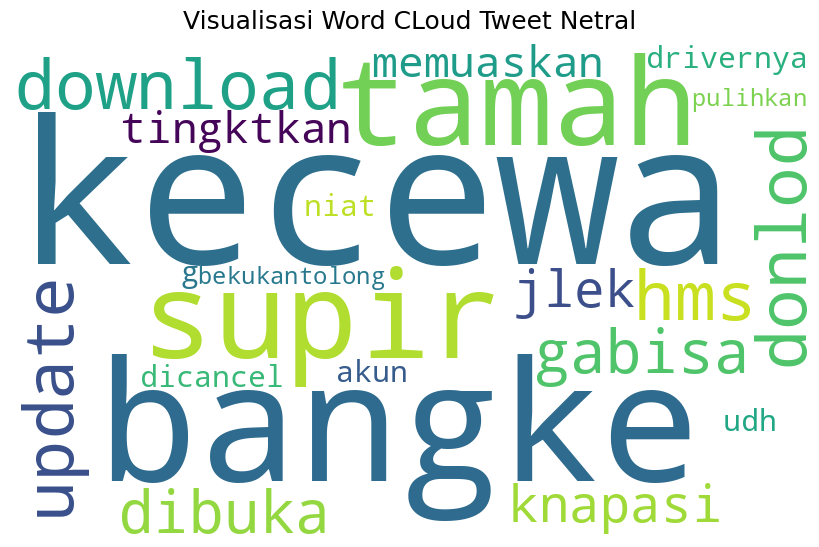

In [25]:
list_words = ' '.join(neutral_tweets['text_akhir'])
wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10
).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Visualisasi Word CLoud Tweet Netral', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

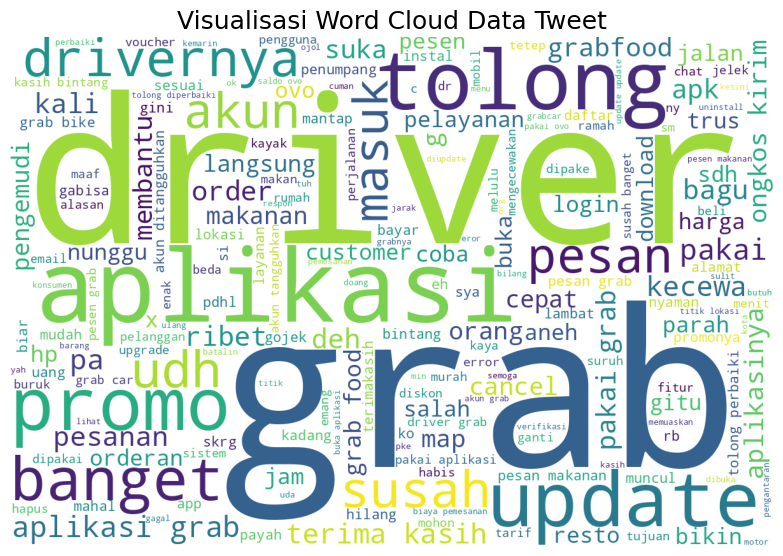

In [26]:
list_words = ' '.join(df['text_akhir'].astype(str).str.lower())

wordcloud = WordCloud(width=1200, height=800, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Visualisasi Word Cloud Data Tweet', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

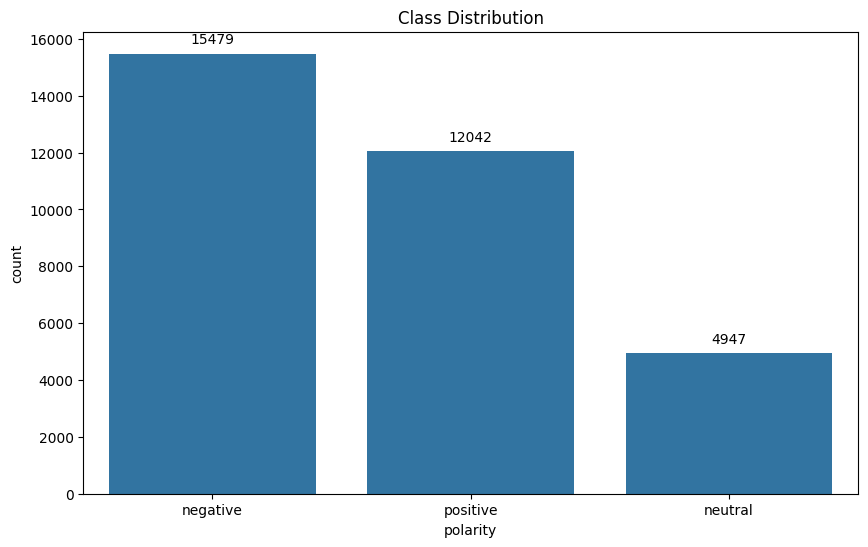

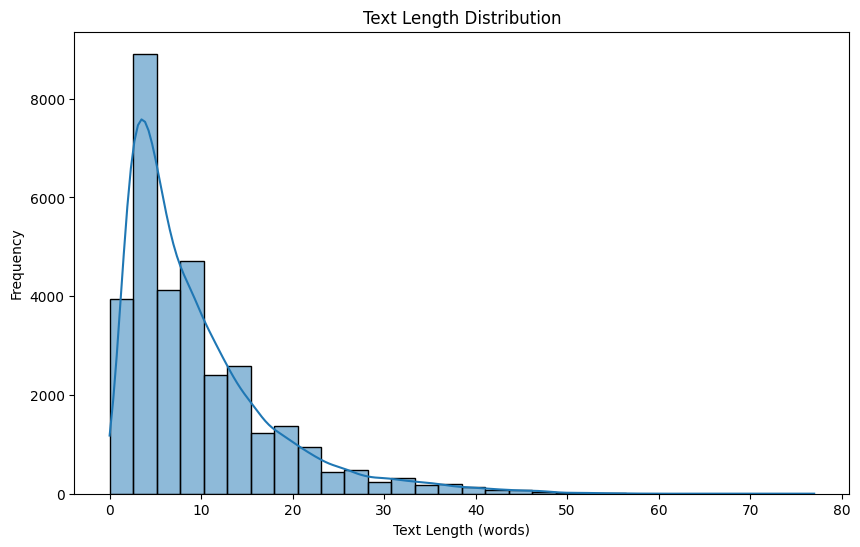

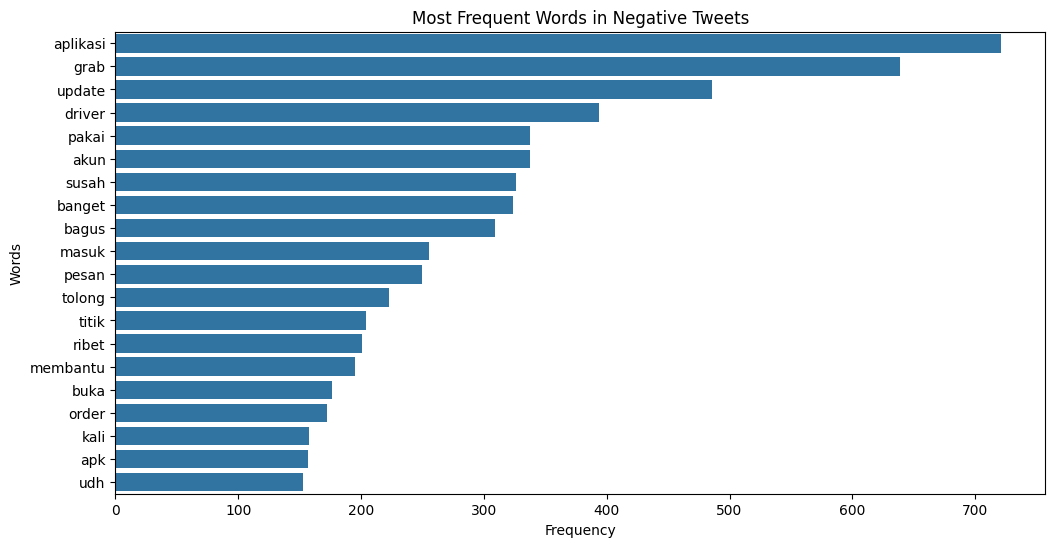

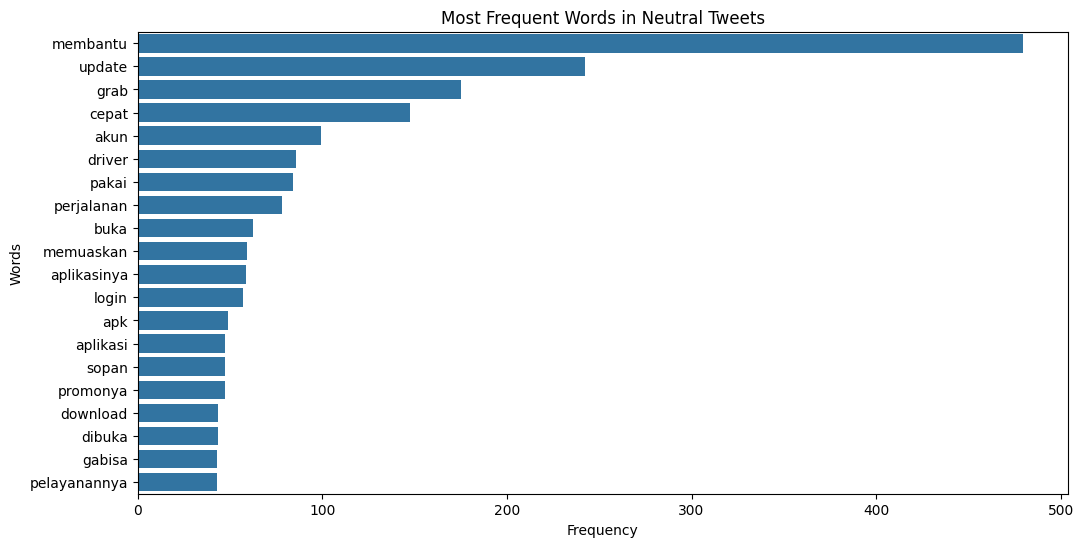

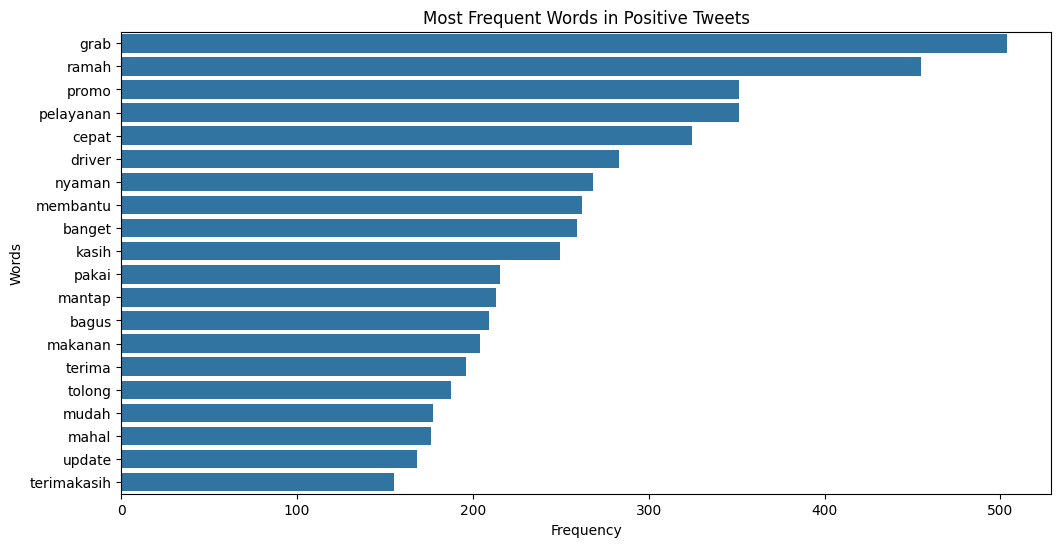

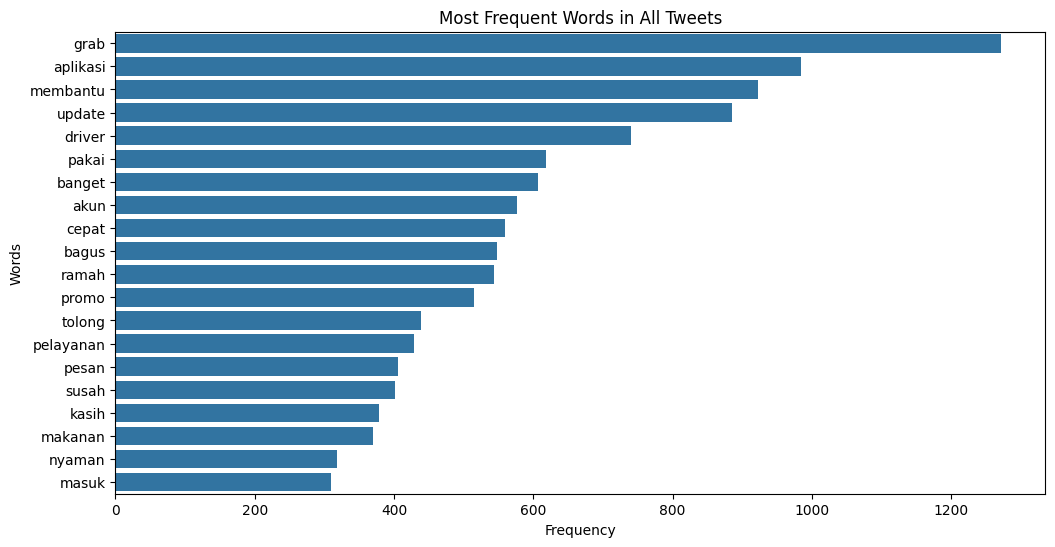

In [27]:
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
df['text_length'] = df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
negative_df = df[df['polarity'] == 'negative']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words in Negative Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


plt.figure(figsize=(12, 6))
neutral_df = df[df['polarity'] == 'neutral']
X = vectorizer.fit_transform(neutral_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words in Neutral Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


plt.figure(figsize=(12, 6))
positive_df = df[df['polarity'] == 'positive']
X = vectorizer.fit_transform(positive_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words in Positive Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

plt.figure(figsize=(12, 6))
X = vectorizer.fit_transform(df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words in All Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [28]:
df.head()

,text_akhir,polarity_score,polarity,text_length
2,guah pelanggan grab grab udh pakai apk zaman azinamoto aplikasi penjemputan manusia bagus grab jawabannya bilang grab buruk kudet serba sempurna bikin apk pakai mobil driver bayar ribet tolong kedepankan attitude ngebacot nilai menilai orang,-7,negative,35
3,ralat penilaian dr minus dikhianati pesanan grab food dikirim berkali terlambat berkali estimasi bertambah pakai prioritas normal hemat salah pencet nggk diubah pesanan nggk dibatalin mesen dr cafe samping hotel nginap uda sejam drivernya bilang dimasak end,-13,negative,37
4,update app grab parah memesan makanan harganya cuman pesos ongkos kirim p biaya tunggu p hitung biayanya mahal makananya sistemnya philipne pulang kampung pt tutup untung sistem gitu putang ina mu,-3,negative,31
5,pesan grabfood drivernya pesanannya pdhal pakai harga standart hemat nunggu jam makanan pesan jam rumah,7,positive,15
6,gara iklan search salah kasih rating sudab cek x keluhan grab motor jelek pengemudi berseragam lecek motor plat sesuai tunggu jauhnya masuk akal contoh masak stasiun driver diambil jaraknya menit lokasi vip habis pindah lapak sebelah,-26,negative,36


In [29]:
df = df.drop(columns=['polarity_score', 'text_length'])

In [30]:
category = pd.get_dummies(df.polarity)
category = category.astype(int)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='polarity')
df

,text_akhir,negative,neutral,positive
2,guah pelanggan grab grab udh pakai apk zaman azinamoto aplikasi penjemputan manusia bagus grab jawabannya bilang grab buruk kudet serba sempurna bikin apk pakai mobil driver bayar ribet tolong kedepankan attitude ngebacot nilai menilai orang,1,0,0
3,ralat penilaian dr minus dikhianati pesanan grab food dikirim berkali terlambat berkali estimasi bertambah pakai prioritas normal hemat salah pencet nggk diubah pesanan nggk dibatalin mesen dr cafe samping hotel nginap uda sejam drivernya bilang dimasak end,1,0,0
4,update app grab parah memesan makanan harganya cuman pesos ongkos kirim p biaya tunggu p hitung biayanya mahal makananya sistemnya philipne pulang kampung pt tutup untung sistem gitu putang ina mu,1,0,0
5,pesan grabfood drivernya pesanannya pdhal pakai harga standart hemat nunggu jam makanan pesan jam rumah,0,0,1
6,gara iklan search salah kasih rating sudab cek x keluhan grab motor jelek pengemudi berseragam lecek motor plat sesuai tunggu jauhnya masuk akal contoh masak stasiun driver diambil jaraknya menit lokasi vip habis pindah lapak sebelah,1,0,0
...,...,...,...,...
188974,drivernya pilih pilih,1,0,0
188977,payahhhhhh jelek banget skrg grab,1,0,0
188986,upgarde melulu kerjaany,1,0,0
188995,pelayanan bagus,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32468 entries, 2 to 188999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_akhir  32468 non-null  object
 1   negative    32468 non-null  int64 
 2   neutral     32468 non-null  int64 
 3   positive    32468 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ MB


In [32]:
data = df['text_akhir'].values
label = df[['negative', 'neutral', 'positive']].values

In [33]:
#Stop Words
stop_words = set(stopwords.words('indonesian'))

df['text_akhir'] = df['text_akhir'].apply(lambda x: ' '.join([w for w in x if not w.lower() in stop_words]))

In [34]:
length = df['text_akhir'].str.len().max()
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [35]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer = tokenizer
tokenizer = Tokenizer(num_words=length, oov_token='')
tokenizer.fit_on_texts(x_train)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(seq_train,
                             maxlen=32,
                             padding='post',
                             truncating='post'
                             )
padded_test = pad_sequences(seq_test,
                            maxlen=32,
                            padding='post',
                            truncating='post'
                             )

In [36]:
max_len = 32
padded_train = pad_sequences(seq_train, maxlen=max_len, padding='post', truncating='post')
padded_test = pad_sequences(seq_test, maxlen=max_len, padding='post', truncating='post')

In [38]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Embedding(input_dim=length, output_dim=32),
    LSTM(32, return_sequences=True),
    BatchNormalization(),
    Dropout(0.6),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    GlobalAveragePooling1D(),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.001)),
])

model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 32, 32)         │        33,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,779 (171.01 KB)

 Trainable params: 43,715 (170.76 KB)

 Non-trainable params: 64 (256.00 B)

In [39]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
class myCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
            print("\nAkurasi dan Validation Accuration sudah mencapai 92%", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = myCallback()

In [41]:
auto_reduction = ReduceLROnPlateau(
   monitor='val_accuracy',
    patience=5,
    factor=0.2,
    min_lr=0.000005,
    verbose=2
)

In [42]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=2
)

In [43]:
history = model.fit(
    padded_train,
    y_train,
    epochs = 50,
    batch_size = 128,
    callbacks=[callbacks, auto_reduction, early_stop],
    validation_data = (padded_test, y_test),
    verbose = 2
)

Epoch 1/50
203/203 - 8s - 40ms/step - accuracy: 0.5174 - loss: 1.0489 - val_accuracy: 0.5174 - val_loss: 1.1218 - learning_rate: 1.0000e-04
Epoch 2/50
203/203 - 10s - 48ms/step - accuracy: 0.6548 - loss: 0.8832 - val_accuracy: 0.7145 - val_loss: 0.8175 - learning_rate: 1.0000e-04
Epoch 3/50
203/203 - 5s - 26ms/step - accuracy: 0.8142 - loss: 0.5684 - val_accuracy: 0.8412 - val_loss: 0.5091 - learning_rate: 1.0000e-04
Epoch 4/50
203/203 - 5s - 23ms/step - accuracy: 0.8688 - loss: 0.4440 - val_accuracy: 0.8671 - val_loss: 0.4209 - learning_rate: 1.0000e-04
Epoch 5/50
203/203 - 6s - 32ms/step - accuracy: 0.8882 - loss: 0.3909 - val_accuracy: 0.8907 - val_loss: 0.3818 - learning_rate: 1.0000e-04
Epoch 6/50
203/203 - 5s - 23ms/step - accuracy: 0.8982 - loss: 0.3679 - val_accuracy: 0.8914 - val_loss: 0.3672 - learning_rate: 1.0000e-04
Epoch 7/50
203/203 - 6s - 27ms/step - accuracy: 0.9044 - loss: 0.3503 - val_accuracy: 0.8941 - val_loss: 0.3689 - learning_rate: 1.0000e-04
Epoch 8/50
203/203 

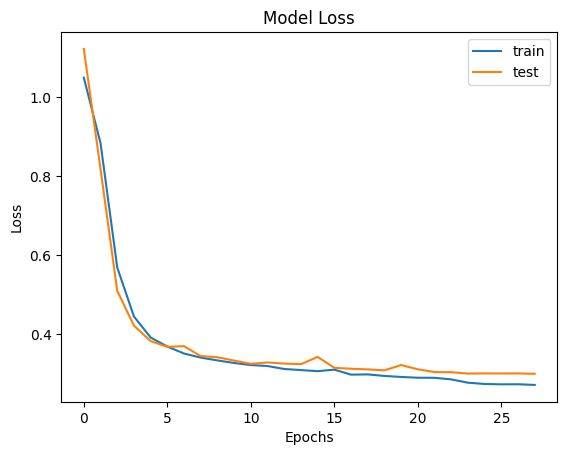

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

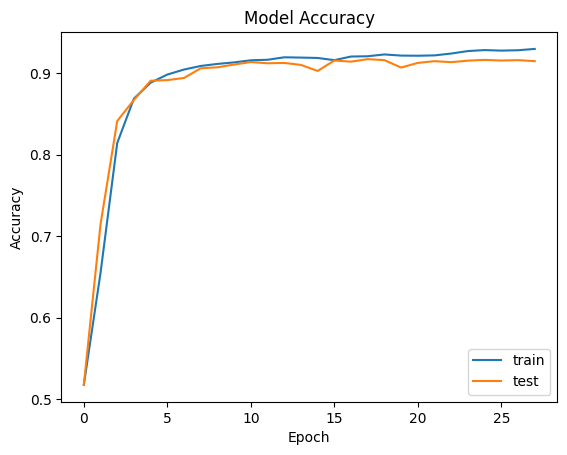

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [60]:
def predict_sentiment(model, text, tokenizer, max_len=200):
  """
  Predicts sentiment of a given text using the LSTM model.

  Args:
      model: Trained LSTM model.
      text: Text to predict sentiment for.
      tokenizer: Tokenizer used for preprocessing text.
      max_len: Maximum sequence length for padding.

  Returns:
      A tuple containing the predicted sentiment class ('Positive', 'Negative', 'Neutral')
      and the corresponding score.
  """
  # Preprocess the text
  sequences = tokenizer.texts_to_sequences([text])
  sequences = pad_sequences(sequences, maxlen=max_len)

  # Predict sentiment
  prediction = model.predict(sequences)[0]
  predicted_class = np.argmax(prediction)  # Get index of class with highest probability

  # Map predicted class to sentiment label
  sentiment_labels = ['Positive', 'Negative', 'Neutral']
  sentiment = sentiment_labels[predicted_class]

  # Calculate sentiment score based on predicted class probabilities
  score = prediction[predicted_class] - 0.5  # Adjust score based on your preference (center at 0)

  return sentiment, score

# Example usage (assuming your model and tokenizer are defined)
text = "drivernya ramah tapi lama banget"
sentiment, score = predict_sentiment(model, text, tokenizer)

print(f"Predicted sentiment: {sentiment} (Score: {score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted sentiment: Neutral (Score: 0.34)


In [47]:
# Save the model
model.save('my_lstm_model.h5')
print("Model saved successfully as my_lstm_model.h5")

Model saved successfully as my_lstm_model.h5


In [48]:
!pip freeze > requirements.txt